# IED distributions during flicker sessions

### Sina Dabiri


In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

## 1. select which subject's data to use
Check excel sheet to see which subjects to include in IED histogram analysis
FlickerStudyMetadata.xlsx

In [2]:
path="Y:\FlickerStudyMetadata.xlsx"
FlickerStudy_df = pd.read_excel(path)

In [3]:
FlickerStudy_df.head()

,Subject_ID,Experiment,Session,Session_version,Completed?,Number of sessions within experiment,Include in analysis?,Brightness lux 1 (40Hz AV)- left,Brightness lux 2 (40Hz AV)- right,Average brightness,Volume dBA 1 (40Hz AV)- left,Volume dBA 2 (40Hz AV)- right,Average Volume,Did occluded?,Single unit recording?,Number of single units,Location of single units,"AEDs taken on day of testing, before testing",Relevant notes
0,FL000,flickerneuro,1,NaN,1,6,1,162,163,162.5,73.9,77.2,75.55,1,0,NaN,NaN,Lamotrigine (300mg); Levetiracetam (750mg); Zo...,Occluded condition was 40Hz-AV; any other notes?
1,FL001,flickerneuro,1,NaN,1,6,1,200,197,198.5,81.4,83.5,82.45,0,1,11,"mid-hippocampus, posterior-cingulate",Lamotrigine (300mg); Levetiracetam (2000mg); T...,NaN
2,FL002,flickerneuro,1,NaN,1,6,1,13,14,13.5,82.4,83.4,82.90,1,0,NaN,NaN,Lamotrigine (200mg).,NaN
3,FL003,flickerneuro,1,NaN,1,6,1,48,50,49.0,79.1,77.5,78.30,1,0,NaN,NaN,Lamotrigine (75mg); Levetiracetam (250mg).,NaN
4,FL003,spep,1,NaN,1,NaN,1,709,720,714.5,91.7,93.4,92.55,1,0,NaN,NaN,None.,NaN


In [4]:
# Filtering for subjects to include in analysis 
sessions = FlickerStudy_df.loc[FlickerStudy_df['Include in analysis?']>0 ,['Subject_ID','Experiment','Session']]
sessions_flickerneuro = sessions.loc[FlickerStudy_df['Experiment']=='flickerneuro']
sessions_flickerneuro


,Subject_ID,Experiment,Session
0,FL000,flickerneuro,1
1,FL001,flickerneuro,1
2,FL002,flickerneuro,1
3,FL003,flickerneuro,1
6,FL005,flickerneuro,1
9,FL007,flickerneuro,1
12,FL009,flickerneuro,1
14,FL010,flickerneuro,1
15,FL011,flickerneuro,1
17,FL012,flickerneuro,1


## 2. Import "All spike" tables for each session into conda dataframe


In [5]:
rows, col = sessions_flickerneuro.shape
rows

14

In [6]:
# loop through to get all of the paths to the "All spike" xl files

IED_path=[""]*rows
for p in range(rows):
    idx = sessions_flickerneuro.index[p]
    subject_path = str(sessions_flickerneuro.loc[idx,'Subject_ID'])+ "/task-flickerneuro/ses-0" + str(sessions_flickerneuro.loc[idx,'Session'])
    IED_path[p]= "Y:/stg-preproc/sub-"+ subject_path + "/IED-preproc/"

In [7]:
IED_path

['Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL001/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL002/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL003/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL005/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL007/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL009/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL010/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL011/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL012/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL014/task-flickerneuro/ses-02/IED-preproc/',
 'Y:/stg-preproc/sub-FL016/task-flickerneuro/ses-01/IED-preproc/',
 'Y:/stg-preproc/sub-FL021/task-flickerneuro/ses-01/IED-preproc/']

In [8]:
# Import subject's Excel file
sessions = np.arange(0,rows)
sessions
# TODO: a loop to get all of the session paths.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [9]:
session_path=IED_path[0]+'sub-'+ str(sessions_flickerneuro.loc[0,'Subject_ID'])+'_allspikes.csv'
session_path

'Y:/stg-preproc/sub-FL000/task-flickerneuro/ses-01/IED-preproc/sub-FL000_allspikes.csv'

In [10]:
session_path_win = os.path.abspath(session_path)
session_path_win

'Y:\\stg-preproc\\sub-FL000\\task-flickerneuro\\ses-01\\IED-preproc\\sub-FL000_allspikes.csv'

In [11]:
os.path.exists(session_path_win)

True

In [12]:
session_df = pd.read_csv(session_path_win)
session_df

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
3,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6062_62,FL000,6062,62,1
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
...,...,...,...,...,...,...
8268,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311968_5,FL000,1311968,5,1
8269,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311982_5,FL000,1311982,5,0
8270,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311998_5,FL000,1311998,5,1
8271,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311999_6,FL000,1311999,6,1


### 2.1: filter out false positive IED events: 0 is true IED 1 is False positive

In [13]:
session_df_tp = session_df[session_df['predicted_class']==0]
session_df_tp

,clip_ids,clip,subject,start,chan,predicted_class
0,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_233_5,FL000,233,5,0
1,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_4503_51,FL000,4503,51,0
2,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_5723_10,FL000,5723,10,0
4,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_65,FL000,6066,65,0
5,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_6066_66,FL000,6066,66,0
...,...,...,...,...,...,...
8259,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1296284_5,FL000,1296284,5,0
8261,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1302343_4,FL000,1302343,4,0
8264,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1305562_99,FL000,1305562,99,0
8266,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1306738_5,FL000,1306738,5,0


### 2.2: filter out overlapping IED events within 100 msec
- fs = 200 Hz -> ts = 5 mses
- 100 msec/5 msec = 20 samples
- next IED start >= 20 samples 

In [85]:
session_df_tp.tail(10)

,clip_ids,clip,subject,start,chan,predicted_class
8254,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1293126_85,FL000,1293126,85,0
8255,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1293126_86,FL000,1293126,86,0
8256,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1294888_86,FL000,1294888,86,0
8257,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1294888_87,FL000,1294888,87,0
8258,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1295056_87,FL000,1295056,87,0
8259,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1296284_5,FL000,1296284,5,0
8261,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1302343_4,FL000,1302343,4,0
8264,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1305562_99,FL000,1305562,99,0
8266,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1306738_5,FL000,1306738,5,0
8269,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1311982_5,FL000,1311982,5,0


In [44]:
session_df_tp[session_df_tp['start']==1295056]

,clip_ids,clip,subject,start,chan,predicted_class
8258,Y:/singer/Lou/Data/temp_flicker-manuscript_IED...,FL000_1295056_87,FL000,1295056,87,0


In [87]:
print
session_df_tp.index.values[3018]

8269

In [104]:
# write a for loop to only keep IED with start time >20 sample later 
m, n = session_df_tp.shape
print(m)
true_IEDs = np.zeros((m,2),dtype=int);
#true_IEDs_df = pd.DataFrame({"start":[session_df_tp.at[0,'start']],
#                            "chan":[session_df_tp.at[0,'chan']]})
# true_IEDs[0,:] = [session_df_tp.at[0,'start'],session_df_tp.at[0,'chan']]
i = 0
for idx, ied in enumerate(session_df_tp.index.values[:-1]): #range(1,m-1):
    #print(idx, ied)
    if (session_df_tp.index.values[[idx+1]][0]): # check here to see what is going on. 
        idx_plus_one = session_df_tp.index.values[[idx+1]][0]
        #print(idx_plus_one)
        if (int(session_df_tp.loc[[ied], 'start']+20) < int(session_df_tp.loc[[idx_plus_one], 'start'])):
            true_IEDs[i,:] = [session_df_tp.loc[ied,'start'],session_df_tp.loc[ied,'chan']]
            i=  i+1
            #true_IEDs_df.
        else:
            ied = ied+1


3019


In [105]:
print(true_IEDs.shape)
true_IEDs[0:10,:]

(3019, 2)


array([[  233,     5],
       [ 4503,    51],
       [ 5723,    10],
       [ 6068,    63],
       [ 6645,    50],
       [ 7946,    38],
       [13096,    53],
       [16118,    62],
       [23647,    38],
       [27313,    51]])

In [106]:
true_IEDs_df = pd.DataFrame(true_IEDs,columns=['start','chan'])
true_IEDs_df

,start,chan
0,233,5
1,4503,51
2,5723,10
3,6068,63
4,6645,50
...,...,...
3014,0,0
3015,0,0
3016,0,0
3017,0,0


In [108]:
#filter out the zero values
true_IEDs_df_clean= true_IEDs_df[(true_IEDs_df['chan']!=0) & (true_IEDs_df['start']!=0)]
true_IEDs_df_clean

,start,chan
0,233,5
1,4503,51
2,5723,10
3,6068,63
4,6645,50
...,...,...
1721,1295056,87
1722,1296284,5
1723,1302343,4
1724,1305562,99


In [109]:
# total spikes over total time
total_spikes = np.shape(true_IEDs_df_clean)[0]
total_time = true_IEDs_df_clean.iloc[-1,0]/12000
total_rate = total_spikes/total_time
print("total spikes: ", total_spikes)
print("total time: ", total_time)
total_rate

total spikes:  1706
total time:  108.89483333333334


15.666491676219716

### 2.3: calculate the IED rate and append to true_IEDs_df

In [110]:
# fs=200 Hz, so to convert samples to rate IED/min: 200*60 sec = 12000, need to calculate the global number of IEDs from all channels every 12000 samples
time_start = true_IEDs_df_clean.iat[0,0]
time_end = true_IEDs_df_clean.iat[-1,0]
print(time_start,time_end)
time = np.arange(1,time_end,12000)
m_t = time.shape
print(time, m_t[0])    

233 1306738
[      1   12001   24001   36001   48001   60001   72001   84001   96001
  108001  120001  132001  144001  156001  168001  180001  192001  204001
  216001  228001  240001  252001  264001  276001  288001  300001  312001
  324001  336001  348001  360001  372001  384001  396001  408001  420001
  432001  444001  456001  468001  480001  492001  504001  516001  528001
  540001  552001  564001  576001  588001  600001  612001  624001  636001
  648001  660001  672001  684001  696001  708001  720001  732001  744001
  756001  768001  780001  792001  804001  816001  828001  840001  852001
  864001  876001  888001  900001  912001  924001  936001  948001  960001
  972001  984001  996001 1008001 1020001 1032001 1044001 1056001 1068001
 1080001 1092001 1104001 1116001 1128001 1140001 1152001 1164001 1176001
 1188001 1200001 1212001 1224001 1236001 1248001 1260001 1272001 1284001
 1296001] 109


In [111]:
time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>1) & (true_IEDs_df_clean['start']<= 12001)]
count, w = np.shape(time_bin)
print(count)
time_bin

6


,start,chan
0,233,5
1,4503,51
2,5723,10
3,6068,63
4,6645,50
5,7946,38


In [112]:
rate = [5 for i in range(0,5)]
rate

[5, 5, 5, 5, 5]

In [113]:
IED_rate = np.zeros((int(m_t[0]),n))
IED_rate[:,0]=time
IED_rate[1:10]

array([[ 12001.,      0.,      0.,      0.,      0.,      0.],
       [ 24001.,      0.,      0.,      0.,      0.,      0.],
       [ 36001.,      0.,      0.,      0.,      0.,      0.],
       [ 48001.,      0.,      0.,      0.,      0.,      0.],
       [ 60001.,      0.,      0.,      0.,      0.,      0.],
       [ 72001.,      0.,      0.,      0.,      0.,      0.],
       [ 84001.,      0.,      0.,      0.,      0.,      0.],
       [ 96001.,      0.,      0.,      0.,      0.,      0.],
       [108001.,      0.,      0.,      0.,      0.,      0.]])

In [114]:

for idx, t in enumerate(time[0:-2]):
    # print(idx,t)
    time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>time[idx]) & (true_IEDs_df_clean['start']<= time[idx+1])]
    count, w = np.shape(time_bin)
    #print(count)
    IED_rate[idx,1] =  count #[count for i in range (idx, idx+count)]
    #true_IEDs_df_clean.loc[idx:idx+count,'IED_rate']=[count for i in range (idx, idx+count)]
    #idx = idx+count

In [115]:
print(IED_rate.shape)
#IED_rate_nzero = np.nonzero(IED_rate)
#m,n = np.shape(IED_rate_nzero)
#print(m,n)
IED_rate[0:10]

(109, 6)


array([[1.00000e+00, 6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [1.20010e+04, 3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [2.40010e+04, 6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [3.60010e+04, 1.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [4.80010e+04, 1.20000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [6.00010e+04, 6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [7.20010e+04, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [8.40010e+04, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [9.60010e+04, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [1.08001e+05, 5.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00]])

In [116]:
# calculating the rate per 5 min: every 200*60*5 = 60000 samples
time_5min = np.arange(1,time_end,60000)
m_5t= time_5min.shape[0]
print(m_5t)
time_5min

22


array([      1,   60001,  120001,  180001,  240001,  300001,  360001,
        420001,  480001,  540001,  600001,  660001,  720001,  780001,
        840001,  900001,  960001, 1020001, 1080001, 1140001, 1200001,
       1260001])

In [117]:
IED_rate_5min = np.zeros((m_5t))

for idx, t in enumerate(time_5min[0:-2]):
    # print(idx,t)
    time_bin = true_IEDs_df_clean[(true_IEDs_df_clean['start']>time_5min[idx]) & (true_IEDs_df_clean['start']<= time_5min[idx+1])]
    count, w = np.shape(time_bin)
    #print(count)
    IED_rate_5min[idx] =  count

In [118]:
IED_rate_5min

array([ 37.,  19.,  30.,  17.,  17.,  77.,  75.,  41.,  99., 117., 127.,
       117., 144., 102., 139., 114.,  83.,  87.,  74., 120.,   0.,   0.])

In [119]:
mean_5min = np.mean(IED_rate_5min)
mean_5min

74.36363636363636

In [120]:
mean = np.mean(IED_rate[:,1])
mean

15.568807339449542

In [130]:
#true_IEDs_df_clean.loc[:,'IED_rate'] = IED_rate
#true_IEDs_df_clean.head(100)
time[0]
count = IED_rate[0,1]
count
t=1
[count for i in range(t-1, t-1+int(count))]
#true_IEDs_df_clean.loc[(true_IEDs_df_clean['start']>t) & (true_IEDs_df_clean['start']<= time[t+1]),'IED_rate']

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]

In [135]:
#for idx, t in enumerate(time):
#    print(idx, t)
#    count = int(IED_rate[idx,1])
#    print(count)
    #true_IEDs_df_clean.loc[(true_IEDs_df_clean['start']>t) & (true_IEDs_df_clean['start']<= time[t+1]),'IED_rate']=[count for i in range (t, t+count)]

In [136]:
true_IEDs_df[true_IEDs_df['chan']==42]

,start,chan
122,307662,42
123,309785,42
125,311324,42
126,312067,42
127,312240,42
...,...,...
1653,1199795,42
1655,1200704,42
1660,1203426,42
1675,1215307,42


In [137]:
count = np.count_nonzero(true_IEDs_df[true_IEDs_df['chan']==42])
count

790

##  3. Plot histograms with different time size bins for each session


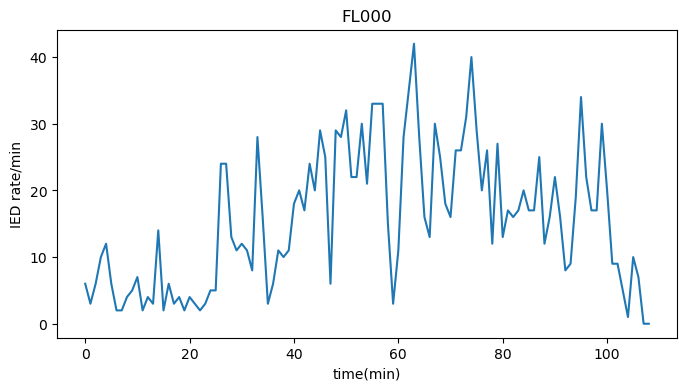

In [138]:
plt.figure(figsize=(8,4))
plt.plot(IED_rate[:,0]/12000,IED_rate[:,1]);
plt.xlabel('time(min)');
plt.ylabel('IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

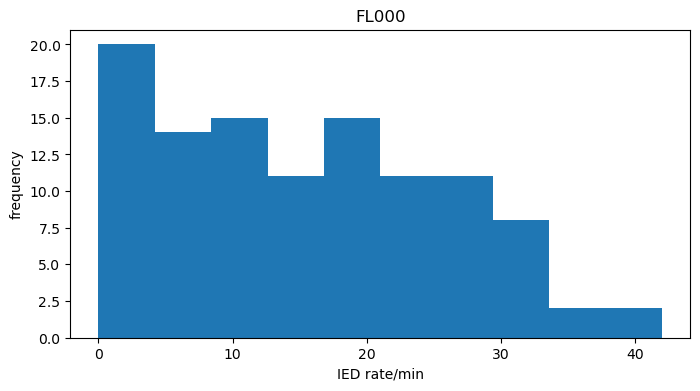

In [139]:
plt.figure(figsize=(8,4))
plt.hist(IED_rate[:,1],bins=10);
plt.ylabel('frequency');
plt.xlabel('IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

<Axes: xlabel='start', ylabel='chan'>

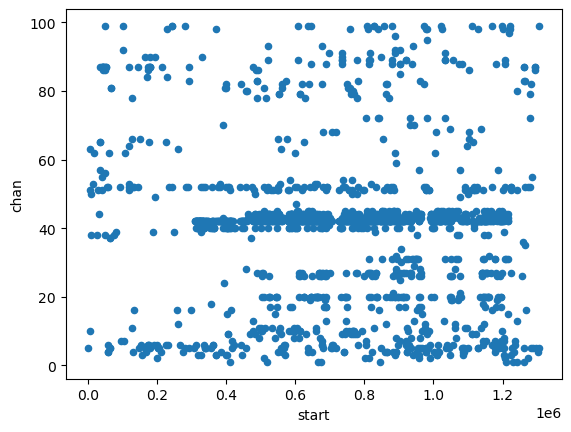

In [140]:
true_IEDs_df_clean.plot.scatter(x='start',y='chan')

In [141]:
true_IEDs_df_clean[true_IEDs_df_clean['chan']==42]

,start,chan,IED_rate
122,307662,42,NaN
123,309785,42,NaN
125,311324,42,NaN
126,312067,42,NaN
127,312240,42,NaN
...,...,...,...
1653,1199795,42,NaN
1655,1200704,42,NaN
1660,1203426,42,NaN
1675,1215307,42,NaN


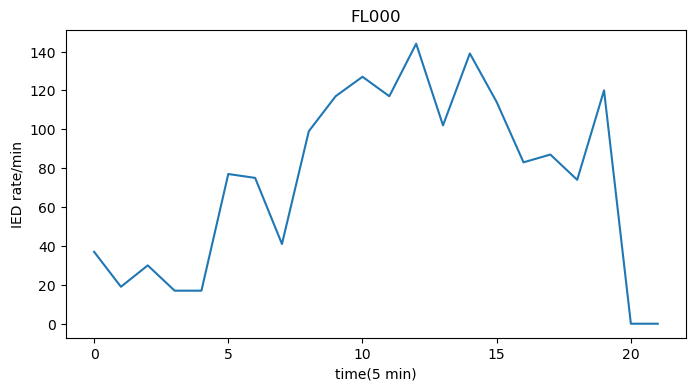

In [142]:
plt.figure(figsize=(8,4))
plt.plot(time_5min/60000,IED_rate_5min);
plt.xlabel('time(5 min)');
plt.ylabel('IED rate/min');
plt.title(str(sessions_flickerneuro.loc[0,'Subject_ID']));

## 4. convert each step into a function and run in a loop for all of the selected subject's sessions
